In [1]:
import pandas as pd
import numpy as np
import torch

import scGeneRAI
import os
import networkx as nx

In [14]:
# ex_data = pd.read_csv('../scGeneRAI/data/example_data.csv').iloc[:,3:]
# ex_data_descriptors = pd.read_csv('../scGeneRAI/data/example_data.csv').iloc[:,1:3]

In [15]:
raw = pd.read_csv('../scGeneRAI/data/raw_data.csv')
filtered_raw = raw[ raw['Cell.Type'].str.count(',') == 0]
filtered_raw = filtered_raw[filtered_raw['Cell.Type'] != 'Unknown']
ex_data = filtered_raw.iloc[:,13:]
ex_data_descriptors = filtered_raw.iloc[:,[2,12]]
data = pd.concat([ex_data_descriptors, ex_data], axis=1)
# column_names = data.columns.tolist()
# column_names[0]
df_sorted = data.sort_values(by=['Cell.Type', 'orig.ident'])
df_sorted.to_csv('./data/sorted_data.csv', index=False)

In [2]:
raw = pd.read_csv('../scGeneRAI/data/sorted_data.csv')
ex_data = raw.iloc[:,2:]
ex_data_descriptors = raw.iloc[:,:2]
ex_data_descriptors

,orig.ident,Cell.Type
0,Control,Columella
1,Control,Columella
2,Control,Columella
3,Control,Columella
4,Control,Columella
...,...,...
11527,DC3000,Xylem
11528,DC3000,Xylem
11529,DC3000,Xylem
11530,DC3000,Xylem


In [3]:
means = ex_data.mean(axis=0)
sds = ex_data.std(axis=0)

ex_data = (ex_data-means)/sds

In [4]:
ex_data

,AT1G01070,AT1G01120,AT1G01370,AT1G01390,AT1G01480,AT1G01610,AT1G01620,AT1G01680,AT1G02310,AT1G02360,...,AT5G66040,AT5G66052,AT5G66400,AT5G66440,AT5G66580,AT5G67080,AT5G67180,AT5G67270,AT5G67480,AT5G67600
0,-0.054527,-0.038922,-0.092499,-0.02941,-0.243243,-0.021193,-0.144734,0.162246,-0.147597,-0.133003,...,0.697969,-0.572590,-0.09927,-0.096919,-0.105081,-0.380798,-0.146433,-0.032068,-0.462590,-0.181579
1,-0.054527,-0.038922,-0.092499,-0.02941,-0.243243,-0.021193,-0.415953,0.274881,-0.147597,-0.133003,...,0.110362,-0.572590,-0.09927,-0.096919,-0.105081,-0.380798,-0.146433,-0.032068,-0.166428,0.005618
2,-0.054527,-0.038922,-0.092499,-0.02941,-0.243243,-0.021193,-0.415953,4.258286,-0.147597,-0.133003,...,-0.346373,-0.572590,-0.09927,-0.096919,-0.105081,-0.380798,-0.146433,-0.032068,-0.462590,-0.296844
3,-0.054527,-0.038922,-0.092499,-0.02941,-0.243243,-0.021193,-0.415953,-0.198732,-0.147597,-0.133003,...,-0.215593,-0.572590,-0.09927,-0.096919,-0.105081,-0.380798,-0.146433,-0.032068,-0.462590,-0.296844
4,-0.054527,-0.038922,-0.092499,-0.02941,-0.243243,-0.021193,-0.415953,3.529426,-0.147597,-0.133003,...,0.680856,-0.572590,-0.09927,-0.096919,-0.105081,-0.380798,-0.146433,-0.032068,-0.462590,7.185974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11527,-0.054527,-0.038922,-0.092499,-0.02941,-0.243243,-0.021193,-0.415953,-0.198732,-0.147597,1.933057,...,-0.346373,-0.572590,-0.09927,2.916652,-0.105081,-0.380798,-0.146433,-0.032068,-0.462590,7.668497
11528,-0.054527,-0.038922,14.341166,-0.02941,-0.243243,-0.021193,4.075240,-0.198732,-0.147597,-0.133003,...,-0.346373,-0.572590,-0.09927,1.736184,-0.105081,-0.380798,-0.146433,12.068704,-0.462590,0.804333
11529,3.804040,-0.038922,-0.092499,-0.02941,-0.243243,-0.021193,-0.119859,-0.198732,-0.147597,-0.133003,...,-0.346373,0.776954,-0.09927,-0.096919,-0.105081,-0.380798,-0.146433,-0.032068,-0.462590,11.028445
11530,-0.054527,-0.038922,-0.092499,-0.02941,-0.243243,-0.021193,-0.075180,0.141431,-0.147597,-0.133003,...,-0.346373,-0.572590,-0.09927,-0.096919,-0.105081,-0.380798,-0.146433,-0.032068,0.813683,7.089199


In [5]:
ex_data_descriptors.iloc[:61,:]

,orig.ident,Cell.Type
0,Control,Columella
1,Control,Columella
2,Control,Columella
3,Control,Columella
4,Control,Columella
...,...,...
56,Control,Columella
57,Control,Columella
58,Control,Columella
59,Control,Columella


In [13]:
model = scGeneRAI.scGeneRAI()

In [14]:
model.fit(ex_data, nepochs = 5, model_depth =2, descriptors = ex_data_descriptors, early_stopping=False, device_name = torch.device('cuda'))


100%|██████████| 5/5 [01:15<00:00, 15.06s/it]

the network trained for 5 epochs (testloss: 1.012345552444458)


In [8]:
torch.save(model.nn, 'saved_model.pt')

In [16]:
preds = model.predict_networks(ex_data.iloc[:61,:], descriptors = ex_data_descriptors.iloc[:61,:], PATH = '.', device_name = torch.device('cuda'))

In [21]:
network_data = pd.concat(preds)

In [22]:
network_data

,LRP,source_gene,target_gene
1,0.000009,AT1G01120,AT1G01070
2,0.000109,AT1G01370,AT1G01070
3,0.000022,AT1G01390,AT1G01070
4,0.000136,AT1G01480,AT1G01070
5,0.000109,AT1G01610,AT1G01070
...,...,...,...
3998365,0.000077,FMO GS-OX3,AT5G67600
3998366,0.000265,FMO GS-OX4,AT5G67600
3998372,0.000082,RBOH F,AT5G67600
3998388,0.000069,FMO GS-OX1,AT5G67600


In [11]:
files = os.listdir('./results')

In [12]:
network_data = pd.concat([pd.read_csv('./results/' + file) for file in files])

In [23]:
network_data['LRP'] = np.abs(network_data['LRP'])
network_data = network_data[network_data['source_gene'] != network_data['target_gene']]

average_network = network_data[['LRP', 'source_gene', 'target_gene']].groupby(['source_gene', 'target_gene']).mean().reset_index()

In [24]:
average_network

,source_gene,target_gene,LRP
0,AT1G01120,AT1G01070,0.000073
1,AT1G01370,AT1G01070,0.000126
2,AT1G01370,AT1G01120,0.000136
3,AT1G01390,AT1G01070,0.000089
4,AT1G01390,AT1G01120,0.000105
...,...,...,...
1998995,RBOH F,AT5G67600,0.000285
1998996,RBOH F,FMO GS-OX1,0.000107
1998997,RBOH F,FMO GS-OX3,0.000164
1998998,RBOH F,FMO GS-OX4,0.000283


In [33]:
edges = average_network.sort_values(by='LRP', ascending=False)#.iloc[:200,:]
edges

,source_gene,target_gene,LRP
1235627,AT5G03510,AT2G44810,0.020251
1026849,AT4G27435,AT2G44810,0.019457
1188491,AT4G39030,AT1G65483,0.018245
658758,AT3G52430,AT1G65483,0.018059
1219122,AT5G02490,AT4G39030,0.017521
...,...,...,...
308271,AT2G41280,AT2G05910,0.000053
1471158,AT5G24580,AT4G23670,0.000052
1241241,AT5G03890,AT1G18250,0.000050
1892545,AT5G62470,AT1G08340,0.000048


In [34]:
network = nx.from_pandas_edgelist(edges, source='source_gene', target='target_gene', edge_attr='LRP')

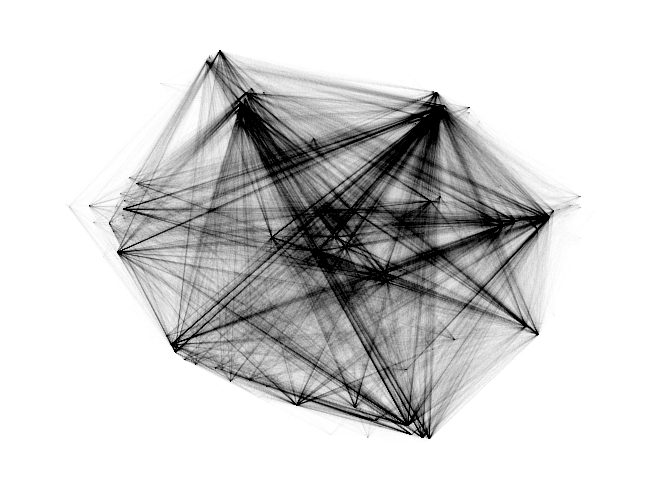

In [37]:
nx.draw(network, with_labels=False, node_size=0, node_color='white', width = edges['LRP']*0.1)

In [ ]:
00